# Author: Faolán Hamilton
## Project Description: Analyse the planning applications submitted to Clare County Council over the past year 
### Source - https://planning.geohive.ie/datasets/housinggovie::irishplanningapplications/explore?layer=0&showTable=true

# Strategy
- Filter the dataset to only Clare County Council (>500,000 records down to 11,000)
- Filter the dataset to only the past year (2025 inclusive ~ 1,000)
- Filter out unneccessary headings 

## Clean-up
- Eircode out of address using regex
- Can I use commas  to determine a townland for address and group by settlement?

# Potential Questions:
- How many of the planning applications are granted?
- Determine a type for each (Residential, commercial etc.)
- Number of residential units 

In [22]:
#Modules to import 

import datetime as dt

# I had to pip install pandas
import pandas as pd

# I had to pip install matplotlib
import matplotlib.pyplot as plt

## Step 1: I went to the irish planning applications geohive website (https://planning.geohive.ie/datasets/housinggovie::irishplanningapplications/explore?filters=eyJQbGFubmluZ0F1dGhvcml0eSI6WyJDbGFyZSBDb3VudHkgQ291bmNpbCJdLCJSZWNlaXZlZERhdGUiOlsxNzM1Njg5NjAwMDAwLDI3MDQyMzM2MDAwMDBdfQ%3D%3D&layer=0&showTable=true) and filtered the +500,000 results to only show Clare County Council applications since 1/1/2025.

### Note - I repeated this step in the New Year to get a list from all of 2025

## Step 2: Download the results as a csv from the webiste.

## Step 3 - Upload the file to this project folder

In [23]:
df = pd.read_csv("ClareCoCo_PlanningApps_2025.csv")

In [24]:
headers = df.columns.tolist()
headers

In [25]:
#remove the headers that are not relevant
drop_col_list = ['OBJECTID','Planning Authority','ITMEasting','ITMNorthing','Applicant Forename','Applicant Surname','Applicant Address','WithdrawnDate','GrantDate','ExpiryDate','Appeal Reference Number','AppealSubmittedDate','FIRequestDate','FIRecDate', 'Appeal Status', 'Site Id', 'ETL_DATE', 'ORIG_FID']
df.drop(columns=drop_col_list, inplace=True)
df.head(1)

In [26]:
df['ReceivedDate']

In [27]:
#https://stackoverflow.com/questions/38067704/how-to-change-the-datetime-format-in-pandas
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
#https://sqlpey.com/python/solved-how-to-change-the-datetime-format-in-pandas/
received_dateformat = pd.to_datetime(df.ReceivedDate)
received_dateformat.dt.strftime('%d/%m/%Y')

----------------------------

### I want to get all unique values in the 'Application Type' column, as I know form my urban planning degree that not all applications are larger scale building development/even new applications

In [28]:
# I want to determine the count of the unique values in the 'Application Types' column.
# Source: https://www.geeksforgeeks.org/python/get-unique-values-from-a-column-in-pandas-dataframe/#:~:text=Using%20value_counts()

application_types = df['Application Type'].value_counts()
print("Value counts in Application Type:\n",application_types);

### I tried to as the CoPilot to define all five categories, but found they were giving me dud sources and not reliable ones. Instead I used two sources from Clare County Council to define the five categories above in layman's terms

##### Here is the Co-Pilot conversation that lead me to go a different direction (manually looking at Clare County Council's website) https://copilot.microsoft.com/shares/yEspVqnVx13PxU259G9ku

Source for extension of duration: https://www.clarecoco.ie/services/planning/applications/permission-durations/

Source: https://mylittlehome.ie/clare-county-council-planning-permission-faqs/#What_Are_the_Main_Types_of_Planning_Permission:~:text=The%20Irish%20Times-,What%20Are%20the%20Main%20Types%20of%20Planning%20Permission%3F,-Full%20Permission%0AThe

Types of Planning Applications:
- Permission - The standard application for building a new dwelling, extension, or major alteration which is valid for five years

- Retention Permission - Required where works have already been carried out without prior approval.

- Outline Permission - Used to establish whether a proposal is acceptable in principle before submitting detailed plans. If granted, a subsequent full application must follow within 3 years.

- Permission Consequent to Outline - The full application that follows the initial outline permission above.

- Extension of Duration - Extend the appropriate period of a planning permission. In certain circumstances, the planning authority may extend the life of a planning permission. 

--------------------------------------------

## Decision Status

In [29]:
# Fill NaN value with 'NOT YET DECIDED'
df['Decision'] = df['Decision'].fillna('NOT YET DECIDED')

In [30]:
# I also need to determine the outcome of the applications that have decisions 
# Source: https://www.geeksforgeeks.org/python/get-unique-values-from-a-column-in-pandas-dataframe/#:~:text=Using%20value_counts()

decision = df['Decision'].value_counts()
print("Value counts in Decisions:\n",decision);

In [31]:
decision_types = decision.index
decision_types

In [32]:
# Source - https://www.geeksforgeeks.org/data-science/plot-a-pie-chart-in-python-using-matplotlib/
# Source -  https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

fig = plt.figure (figsize = (10,10))

# The below source was incredibly useful to help me to figure out plot label sizing
# Source - https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart

# Source for label positioning - https://proclusacademy.com/blog/customize_matplotlib_piechart/
# Source for edgecolour - https://colab.research.google.com/github/Vikasdonta1/Data-Visualization-using-Matplotlib-Course/blob/main/Matplotlib_Plot_a_Pie_Chart.ipynb#scrollTo=4pKiYTKx6bgP

plt.pie(decision, labels = decision, labeldistance = 0.8, wedgeprops={'edgecolor': '#404040'}, textprops={'fontsize': 12, 'color' : '#404040', 'weight':'bold'}, autopct='%1.1f%%', pctdistance = 0.6, colors =['#a6d96a', '#fdae61','#d7191c', '#1a9641'])

plt.title("Decision Status for Clare Planning Applications 2025")

# Source - https://matplotlib.org/stable/api/legend_api.html
legend = plt.legend(decision_types, labelcolor = "#404040", shadow = True, loc = "upper left", title = 'Legend', facecolor='#f4f1de', fontsize = 'medium', title_fontsize = 'large')
# Source - https://matplotlib.org/stable/gallery/text_labels_and_annotations/legend_demo.html
legend.get_title().set_color("#000000")

plt.show()

A map showing the Decision Status of Planning Applications

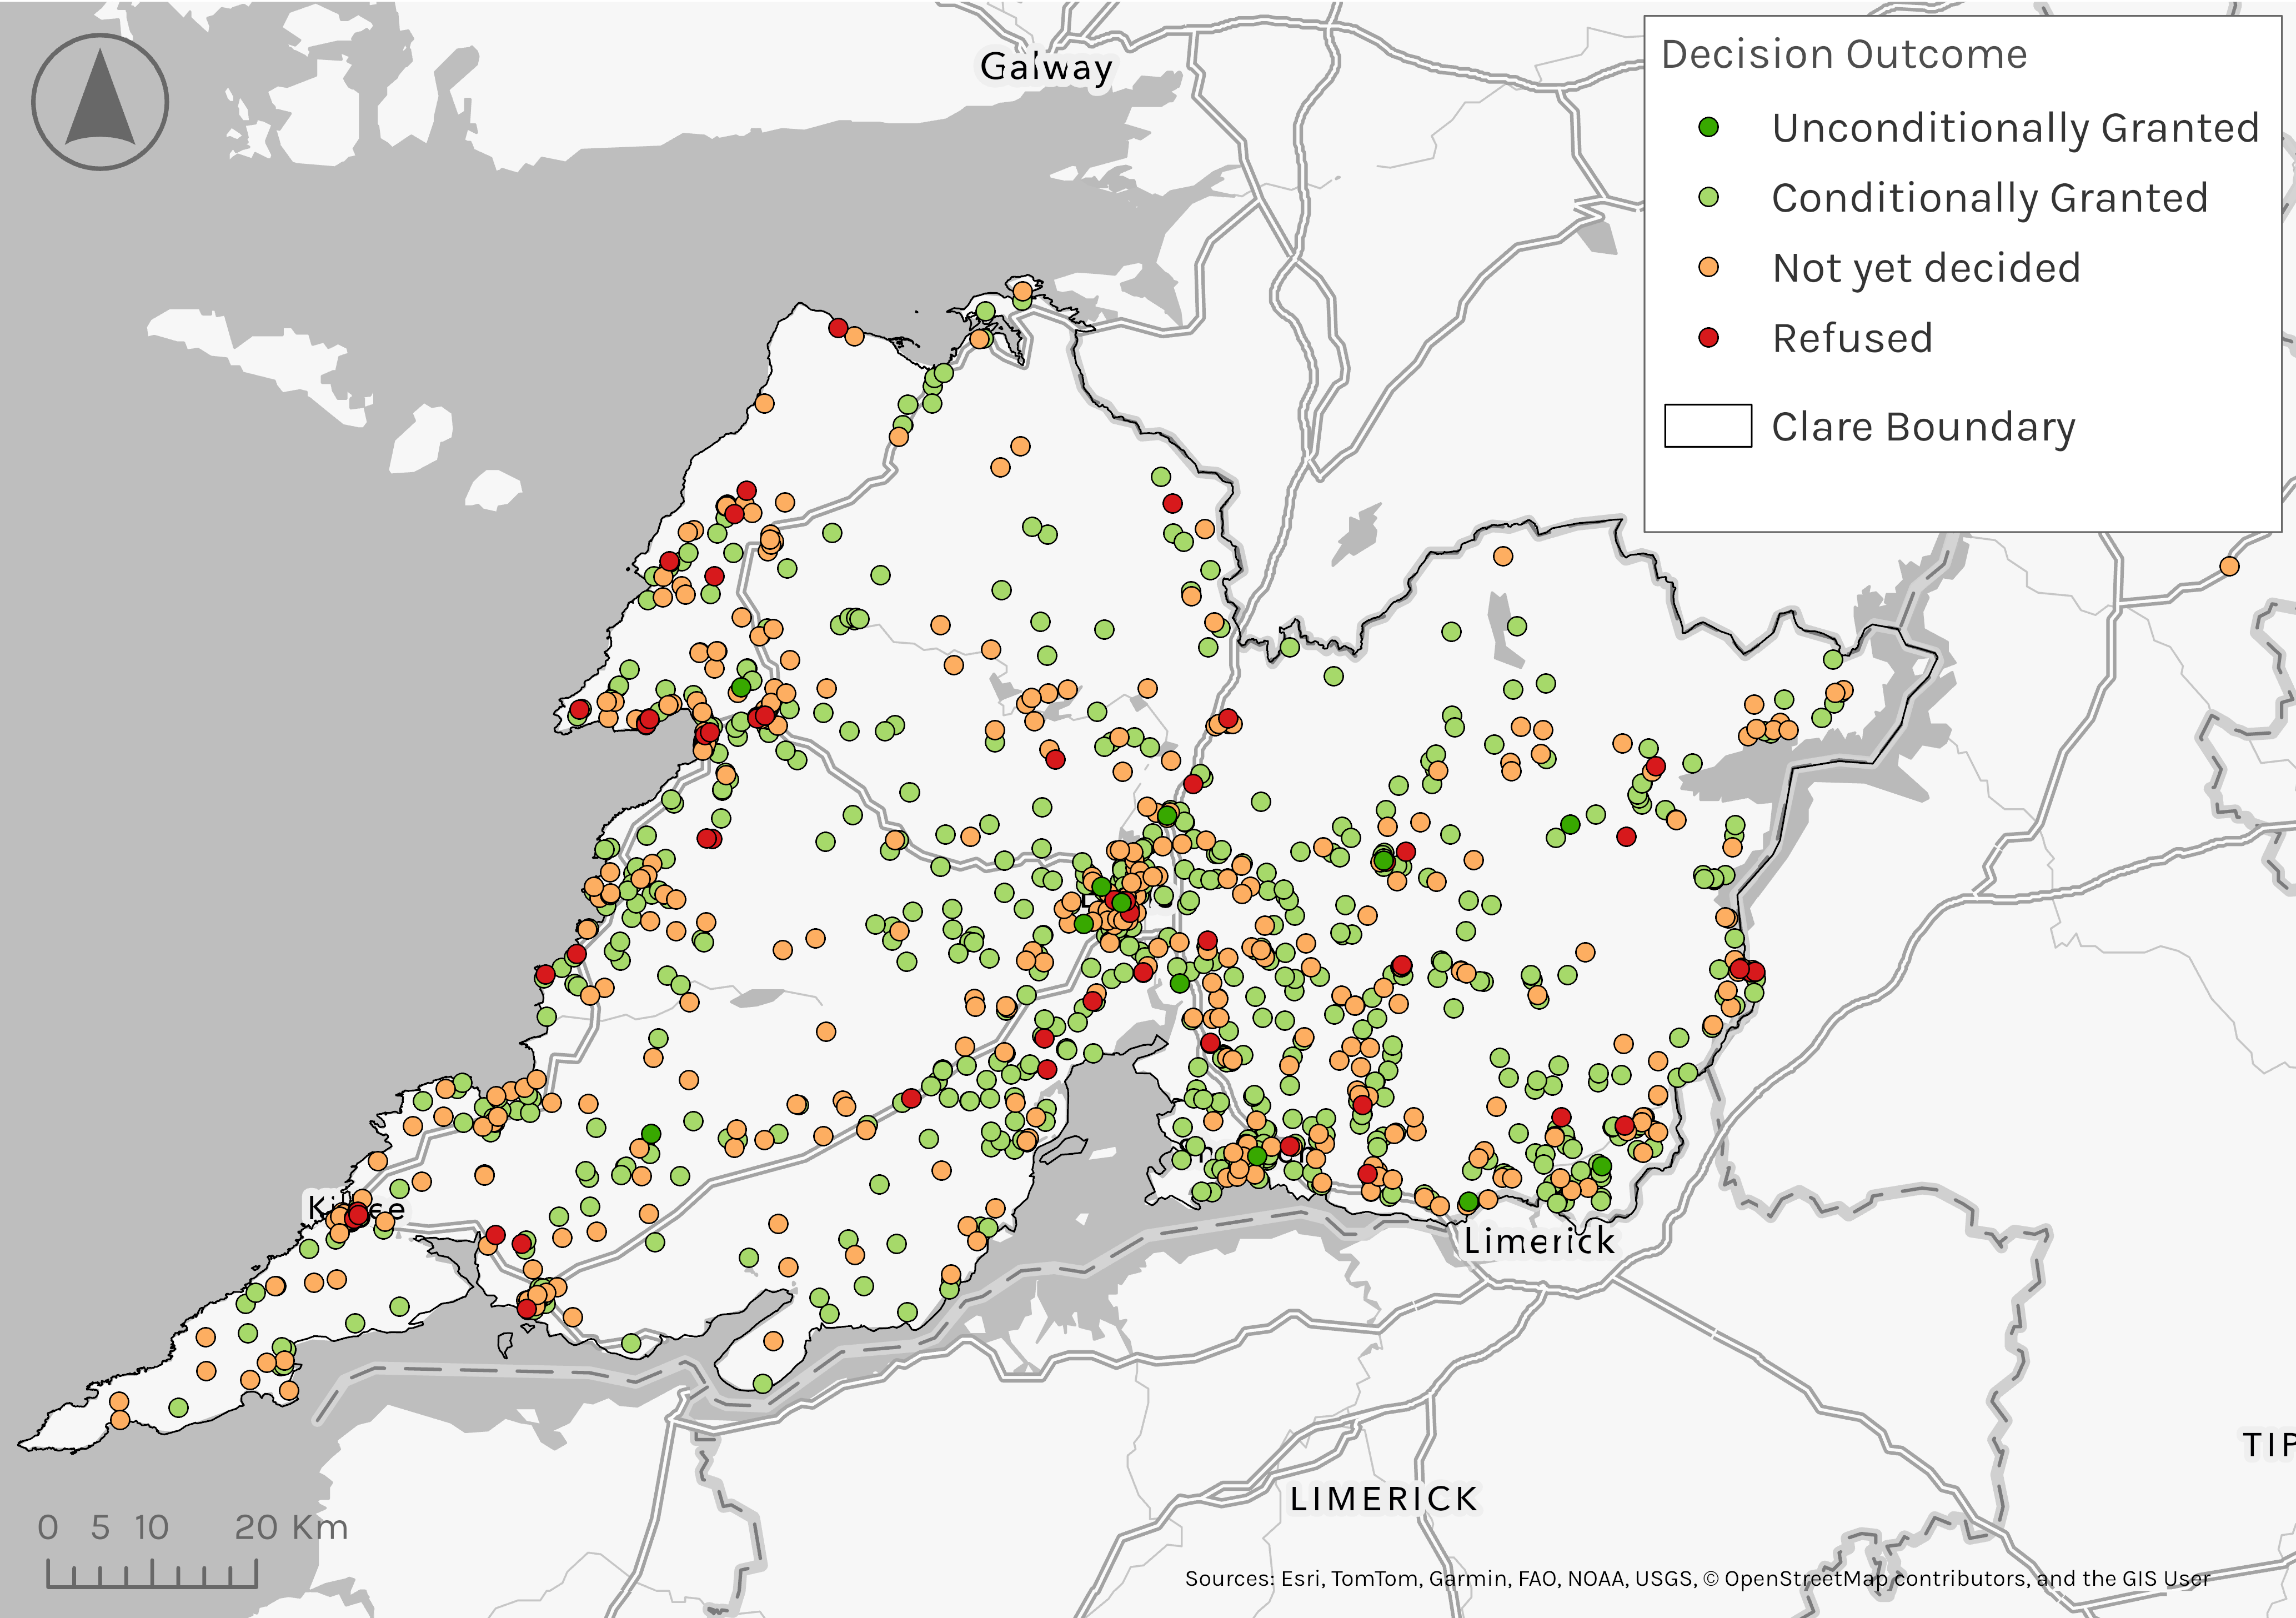

--------------------------------------------------

## Residential Units

In [33]:
# The sum of Residential units applied for 
x = sum(df['NumResidentialUnits'])
print (f"The number of residential units applied for in County Clare in 2025 is {x:,}")

In [ ]:
no_res = df.query('NumResidentialUnits == 0')

one_unit = df.query('NumResidentialUnits == 1')

to_fifty_units = df.query('NumResidentialUnits == 2 and NumResidentialUnits > 2 and NumResidentialUnits < 50')
#two_to_fifty_units

In [35]:
df['ResUnitsGroup'] = 

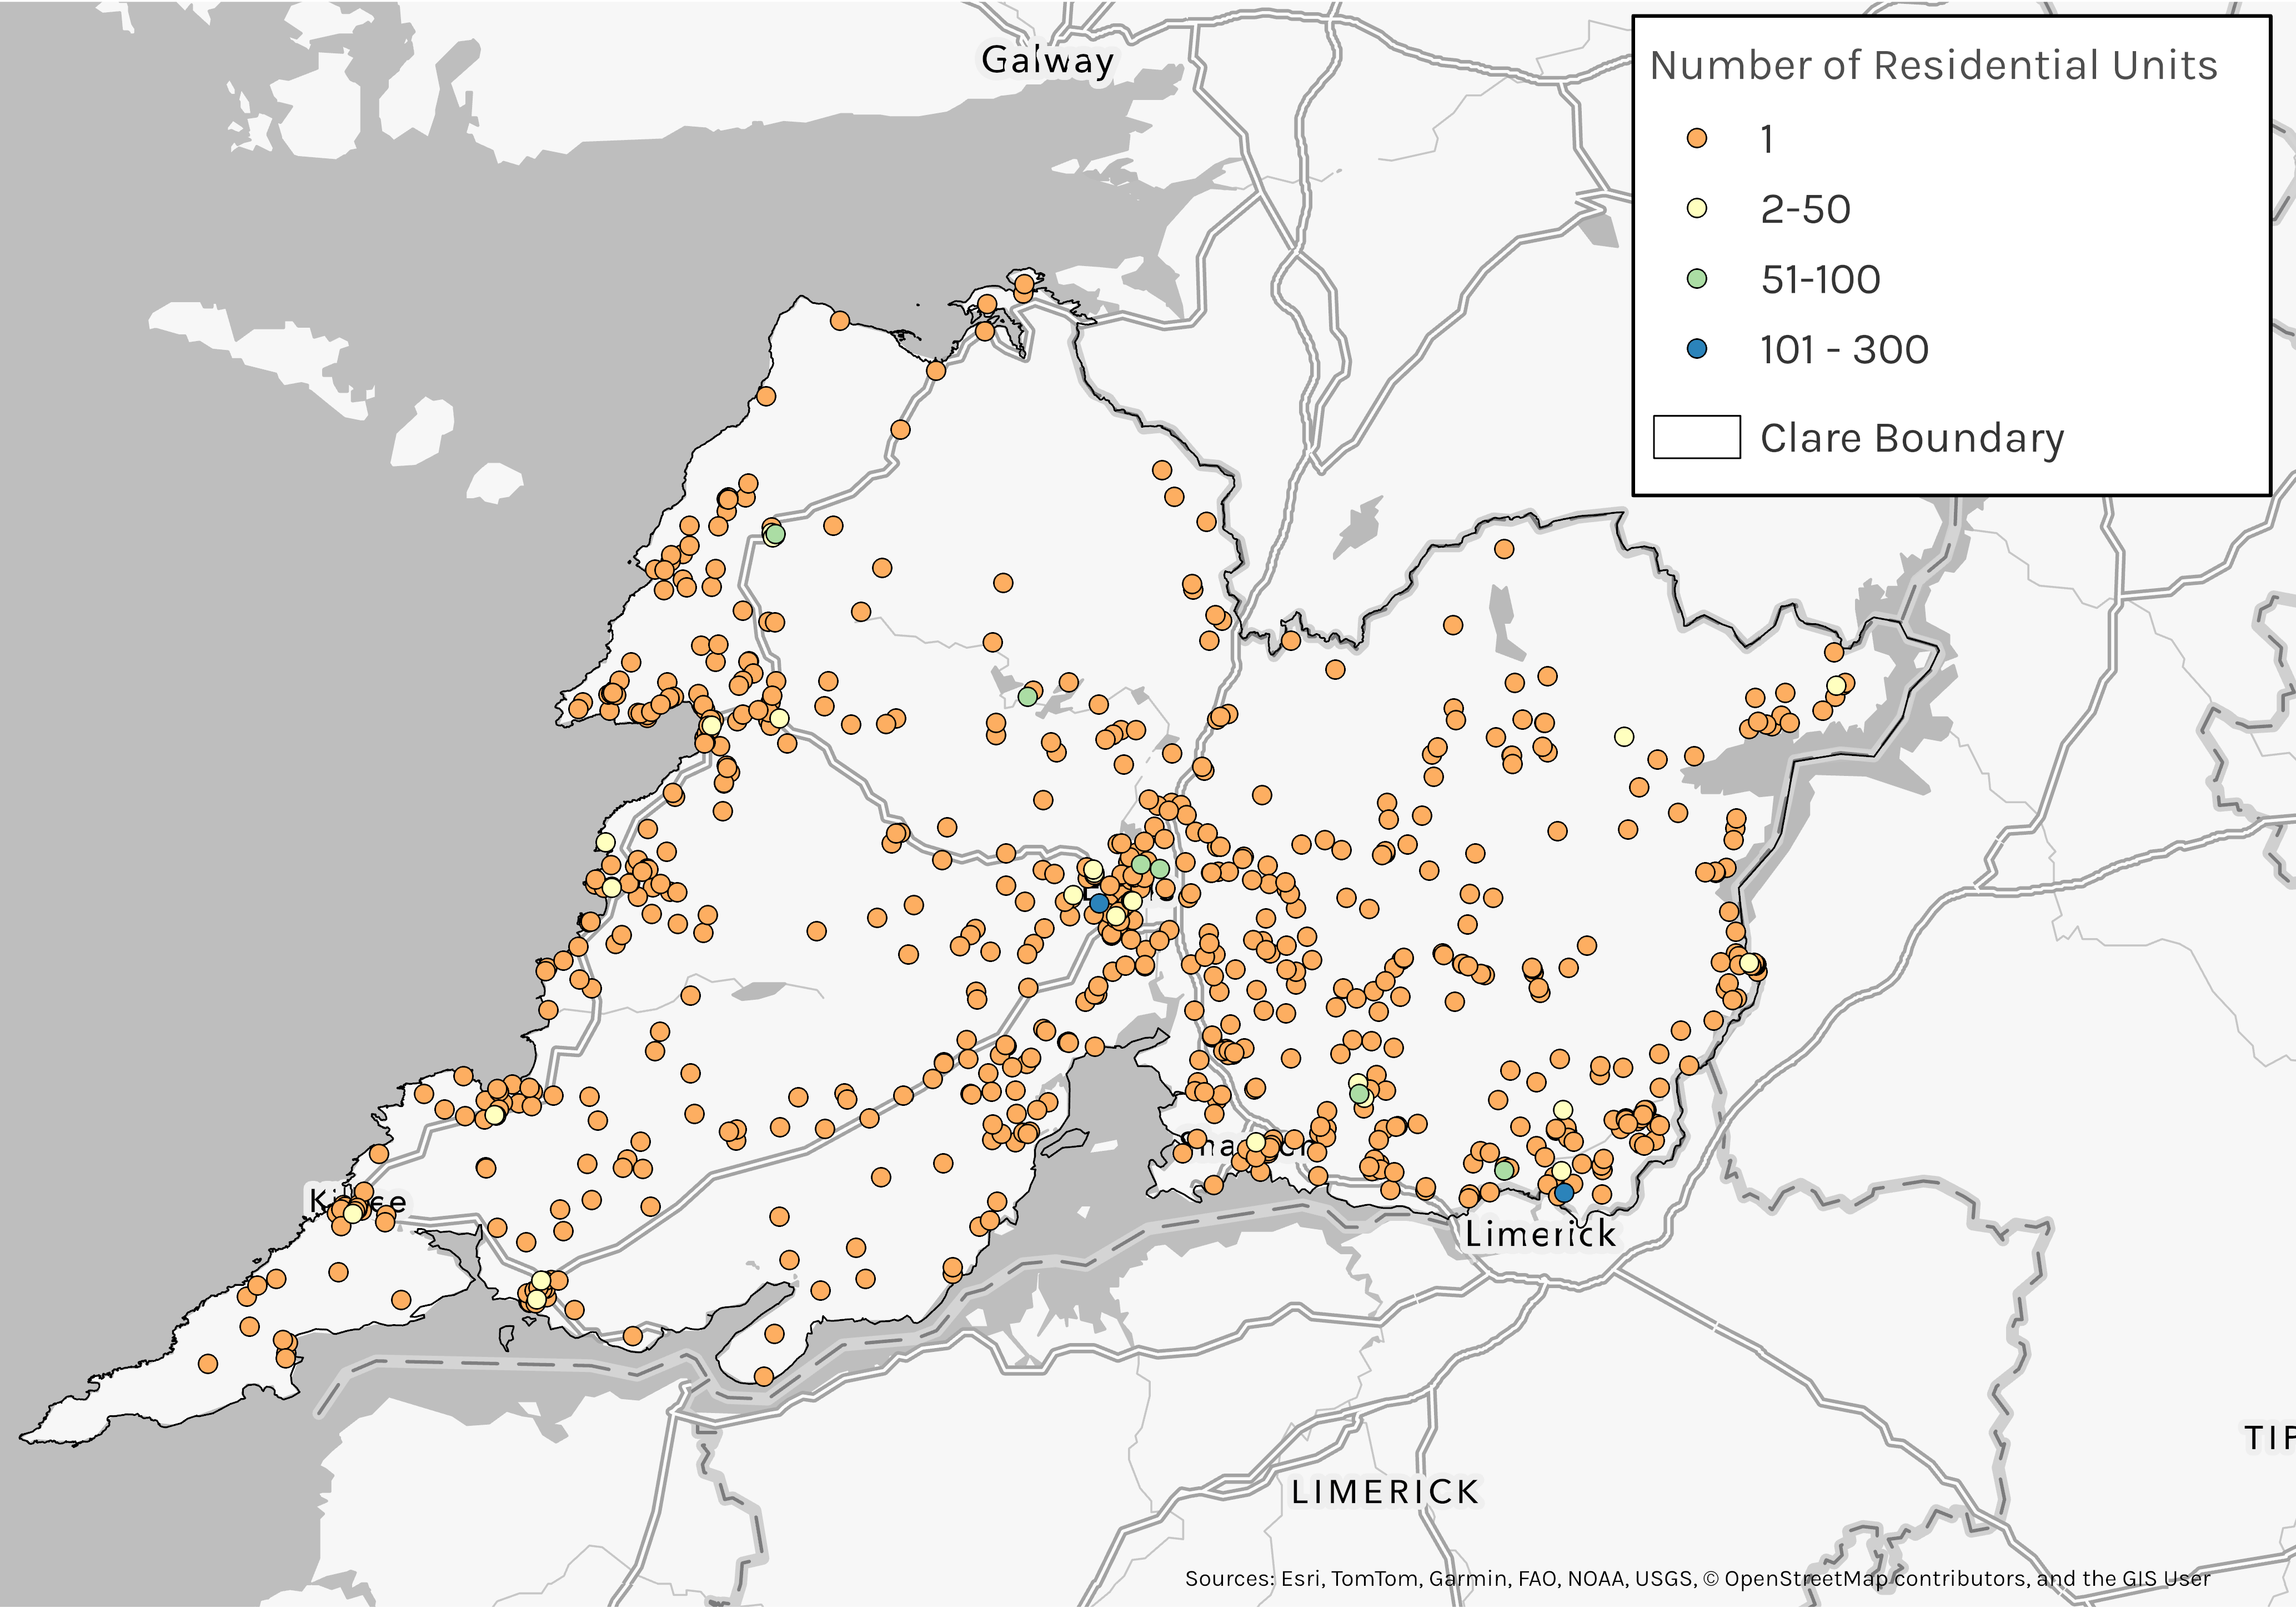

### The End